#### 환경변수 확인

In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))

### ChatOpenAI

OpenAI 사의 채팅 전용 Large Language Model(LLM) 입니다.
객체를 생성할때 필요한 매개변수는 다음과 같습니다.

`temperature`
- 사용할 샘플링의 온도는 0.0 ~ 2.0 사이의 값을 가지며, 0.0 이면 창의성이 없고, 2.0 이면 창의성이 높아집니다.  

`model_name: 모델명`  
- gpt-4o
- gpt-3.5-turbo  

`max_tokens: 최대 토큰수`  
- 채팅 완성에서 생성할 토큰의 최대 개수입니다.

In [ ]:
from dotenv import load_dotenv
import os

# .env 파일 로드
load_dotenv()


env_vars = {
    "OPENAI_API_KEY": os.getenv("OPENAI_API_KEY"),
    "LANGCHAIN_TRACING_V2": os.getenv("LANGCHAIN_TRACING_V2"),
    "LANGCHAIN_ENDPOINT": os.getenv("LANGCHAIN_ENDPOINT"),
    "LANGCHAIN_API_KEY": os.getenv("LANGCHAIN_API_KEY"),
    "LANGCHAIN_PROJECT": os.getenv("LANGCHAIN_PROJECT"),
}
print(env_vars)

In [3]:
import os
from langsmith_tracker import LangsmithTracker

# 인스턴스를 생성할 때 필요한 매개변수를 전달합니다.
tracker = LangsmithTracker(
    project_name=os.getenv("LANGCHAIN_PROJECT"), enable_tracking=True
)

# 인스턴스의 메서드를 호출합니다.
tracker.configure_tracking()

Langsmith 추적이 활성화되었습니다. [프로젝트명: langchain_note_2024]


In [4]:
ChatOpenAI?

Init signature:
ChatOpenAI(
    *args: Any,
    name: Optional[str] = None,
    cache: Union[langchain_core.caches.BaseCache, bool, NoneType] = None,
    verbose: bool = None,
    callbacks: Union[list[langchain_core.callbacks.base.BaseCallbackHandler], langchain_core.callbacks.base.BaseCallbackManager, NoneType] = None,
    tags: Optional[list[str]] = None,
    metadata: Optional[dict[str, Any]] = None,
    custom_get_token_ids: Optional[Callable[[str], list[int]]] = None,
    callback_manager: Optional[langchain_core.callbacks.base.BaseCallbackManager] = None,
    rate_limiter: Optional[langchain_core.rate_limiters.BaseRateLimiter] = None,
    disable_streaming: Union[bool, Literal['tool_calling']] = False,
    client: Any = None,
    async_client: Any = None,
    root_client: Any = None,
    root_async_client: Any = None,
    model: str = 'gpt-3.5-turbo',
    temperature: float = 0.7,
    model_kwargs: Dict[str, Any] = None,
    api_key: Optional[pydantic.types.SecretStr] = None,
  

In [3]:
from langchain_openai import ChatOpenAI

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o",  # 모델명
)

# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
print(f"[답변]: {llm.invoke(question)}")

[답변]: content='대한민국의 수도는 서울입니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 16, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_159d8341cc', 'finish_reason': 'stop', 'logprobs': None} id='run-102a9b27-4747-423a-a5ca-16cc1eb92da1-0' usage_metadata={'input_tokens': 16, 'output_tokens': 8, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [5]:
# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
response = llm.invoke(question)

response

AIMessage(content='대한민국의 수도는 서울입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 16, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_159d8341cc', 'finish_reason': 'stop', 'logprobs': None}, id='run-87de056e-8e8b-450d-9c93-b5f23ee17a06-0', usage_metadata={'input_tokens': 16, 'output_tokens': 8, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
response.content

'대한민국의 수도는 서울입니다.'

In [7]:
response.response_metadata

{'token_usage': {'completion_tokens': 8,
  'prompt_tokens': 16,
  'total_tokens': 24,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-2024-08-06',
 'system_fingerprint': 'fp_159d8341cc',
 'finish_reason': 'stop',
 'logprobs': None}

#### LogProb 활성화
토큰: 문장을 구성하는 작은 단위로, 단어나 글자 같은 요소. 예를 들어, "안녕하세요"라는 문장이 있을 때, 이 문장을 여러 개의 토큰으로 나눌 수 있다.  
확률: 인공지능 모델이 각 토큰을 예상할 확률을 의미 예를 들어, 모델이 "안녕" 다음에 올 단어로 "하세요"를 예상할 때, "하세요"가 나올 가능성에 대한 확률을 말한다.  
로그 값: 이 확률을 다루기 쉽게 만들기 위해 **로그(logarithm)**라는 수학적인 변환을 하는 것인데, 보통 아주 작은 숫자를 더 쉽게 다루기 위해 사용된다.  

In [9]:
# 객체 생성
llm_with_logprob = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-3.5-turbo",  # 모델명
).bind(logprobs=True)

# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
response = llm_with_logprob.invoke(question)

# 결과 출력
response.response_metadata

{'token_usage': {'completion_tokens': 15,
  'prompt_tokens': 24,
  'total_tokens': 39,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-3.5-turbo-0125',
 'system_fingerprint': None,
 'finish_reason': 'stop',
 'logprobs': {'content': [{'token': '대',
    'bytes': [235, 140, 128],
    'logprob': -0.04211222,
    'top_logprobs': []},
   {'token': '한',
    'bytes': [237, 149, 156],
    'logprob': -3.1281633e-07,
    'top_logprobs': []},
   {'token': '\\xeb\\xaf',
    'bytes': [235, 175],
    'logprob': -1.6240566e-06,
    'top_logprobs': []},
   {'token': '\\xbc', 'bytes': [188], 'logprob': 0.0, 'top_logprobs': []},
   {'token': '\\xea\\xb5',
    'bytes': [234, 181],
    'logprob': -3.1281633e-07,
    'top_logprobs': []},
   {'token': '\\xad', 'bytes': [173], 'logprob': 0.0, 'top_logprobs': []},
   {'tok

#### 스트리밍 출력
질의의 대한 답변을 실시간으로 받는 것

In [11]:
# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("서울에서 가을에 산책하기 좋은 장소는? (10곳 추천)")

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
for token in answer:
    print(token.content, end="", flush=True)

서울에서 가을에 산책하기 좋은 장소는 다음과 같습니다:

1. **남산공원**: 서울의 중심에 위치한 남산은 단풍이 아름답게 물드는 가을에 특히 매력적입니다. 남산타워까지 이어지는 산책로도 추천합니다.

2. **북한산 국립공원**: 다양한 등산 코스와 함께 가을 단풍을 즐길 수 있는 곳으로, 자연 속에서 힐링하기 좋습니다.

3. **서울숲**: 도심 속에서 자연을 느낄 수 있는 서울숲은 가을에 산책하기에 안성맞춤입니다. 다양한 식물과 동물도 관찰할 수 있습니다.

4. **경복궁**: 고궁의 아름다움과 함께 가을의 정취를 느낄 수 있는 곳으로, 특히 단풍이 물든 경복궁의 모습은 매우 인상적입니다.

5. **창덕궁 후원**: 비밀의 정원이라 불리는 창덕궁 후원은 가을에 더욱 아름다워지는 곳으로, 사전 예약을 통해 관람할 수 있습니다.

6. **한강공원**: 한강을 따라 조성된 여러 공원들은 가을 산책에 제격입니다. 특히 여의도 한강공원은 단풍과 함께 강변을 걸을 수 있는 좋은 장소입니다.

7. **덕수궁 돌담길**: 덕수궁을 둘러싼 돌담길은 가을에 낭만적인 분위기를 자아내며, 산책하기에 좋습니다.

8. **올림픽공원**: 넓은 공원 내에 다양한 산책로가 있으며, 가을에는 단풍과 억새가 아름답게 피어납니다.

9. **양재천**: 도심 속에서 자연을 느낄 수 있는 하천으로, 가을에는 산책로를 따라 단풍을 즐길 수 있습니다.

10. **인왕산**: 서울 시내를 한눈에 내려다볼 수 있는 인왕산은 가을에 산책하며 경치를 감상하기에 좋은 장소입니다.

이 장소들은 가을의 아름다움을 만끽하며 산책하기에 적합한 곳들입니다.

#### 멀티모달 모델(이미지 인식)
"모달(modal)"은 보통 "모드(mode)" 또는 "형태(form)"라는 의미를 지니며, **멀티 모달(multimodal)** 에서 "모달"은 정보나 데이터를 전달하는 다양한 형태나 방식을 뜻 함

멀티모달의 뜻은 여러가지 형태의 정보를 통합하여 처리하는 기술이나 접근 방식

- 텍스트: 문서, 책, 웹 페이지 등의 글자로 된 정보  
- 이미지: 사진, 그래픽, 그림 등 시각적 정보  
- 오디오: 음성, 음악, 소리 효과 등의 청각적 정보  
- 비디오: 동영상 클립, 실시간 스트리밍 등 시각적 및 청각적 정보의 결합  


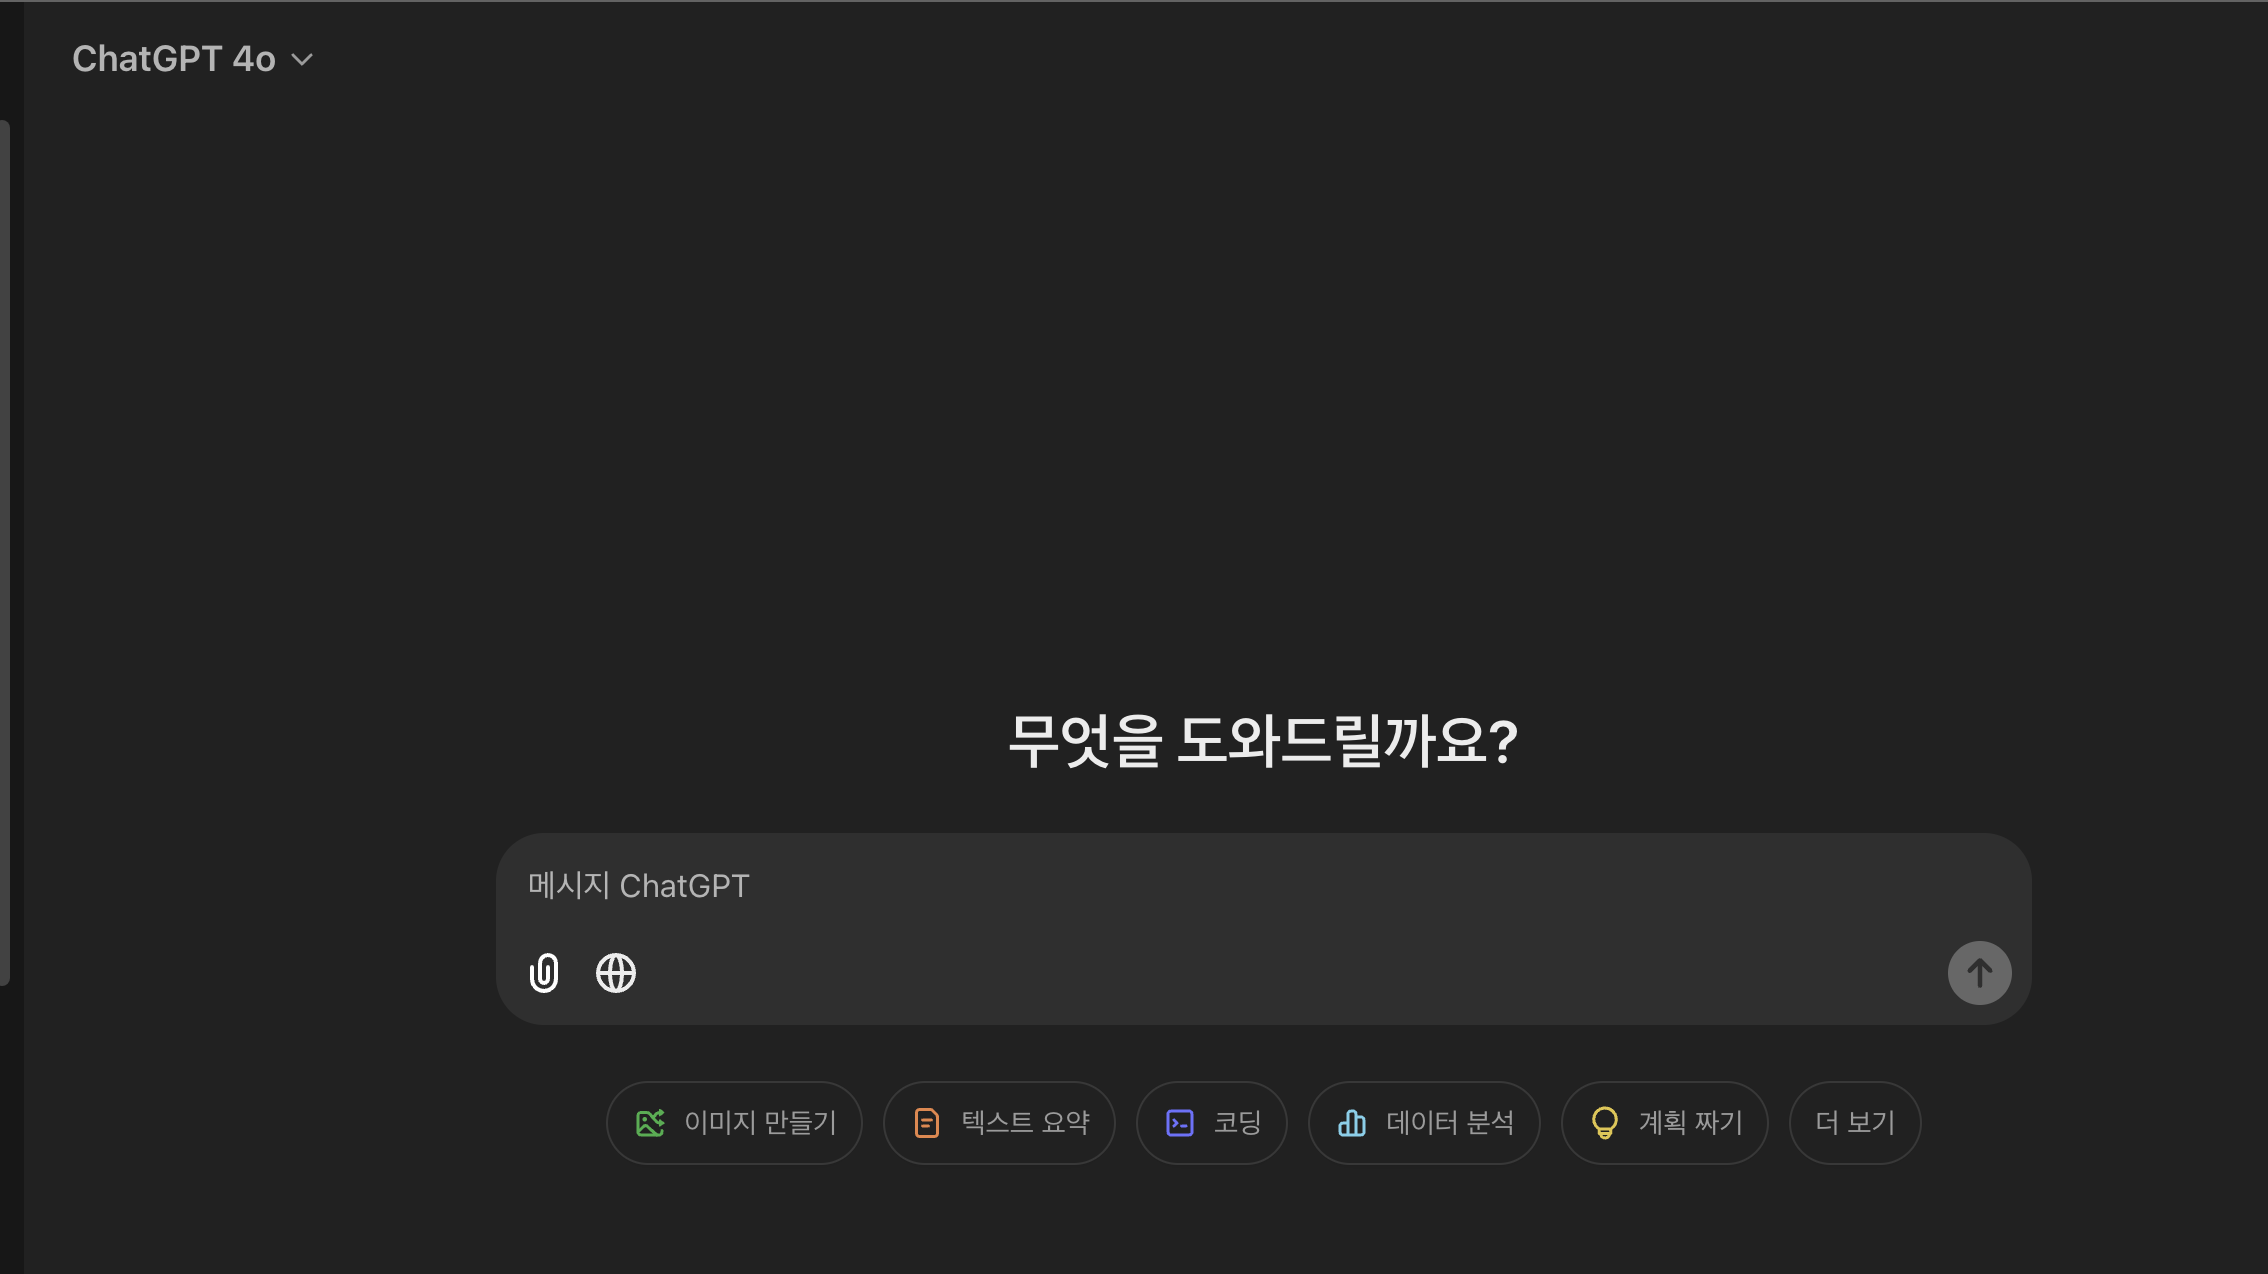

ChatGPT 인터페이스의 스크린샷입니다. 화면 상단에는 "ChatGPT 4.0"이라고 표시되어 있으며, 중앙에는 "무엇을 도와드릴까요?"라는 질문이 있습니다. 하단에는 "메시지 ChatGPT" 입력란과 함께 여러 기능 버튼들이 나열되어 있습니다. 버튼에는 "이미지 만들기", "텍스트 요약", "코딩", "데이터 분석", "계획 짜기", "더 보기" 등이 있습니다. 화면은 어두운 테마로 설정되어 있습니다.

In [8]:
from langchain_openai import ChatOpenAI
from multimodal import MultiModal

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

multimodal_llm = MultiModal(llm)

IMAGE = ("../images/sample.png", "image")

# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "../images/sample.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력
for token in answer:
    print(token.content, end="", flush=True)


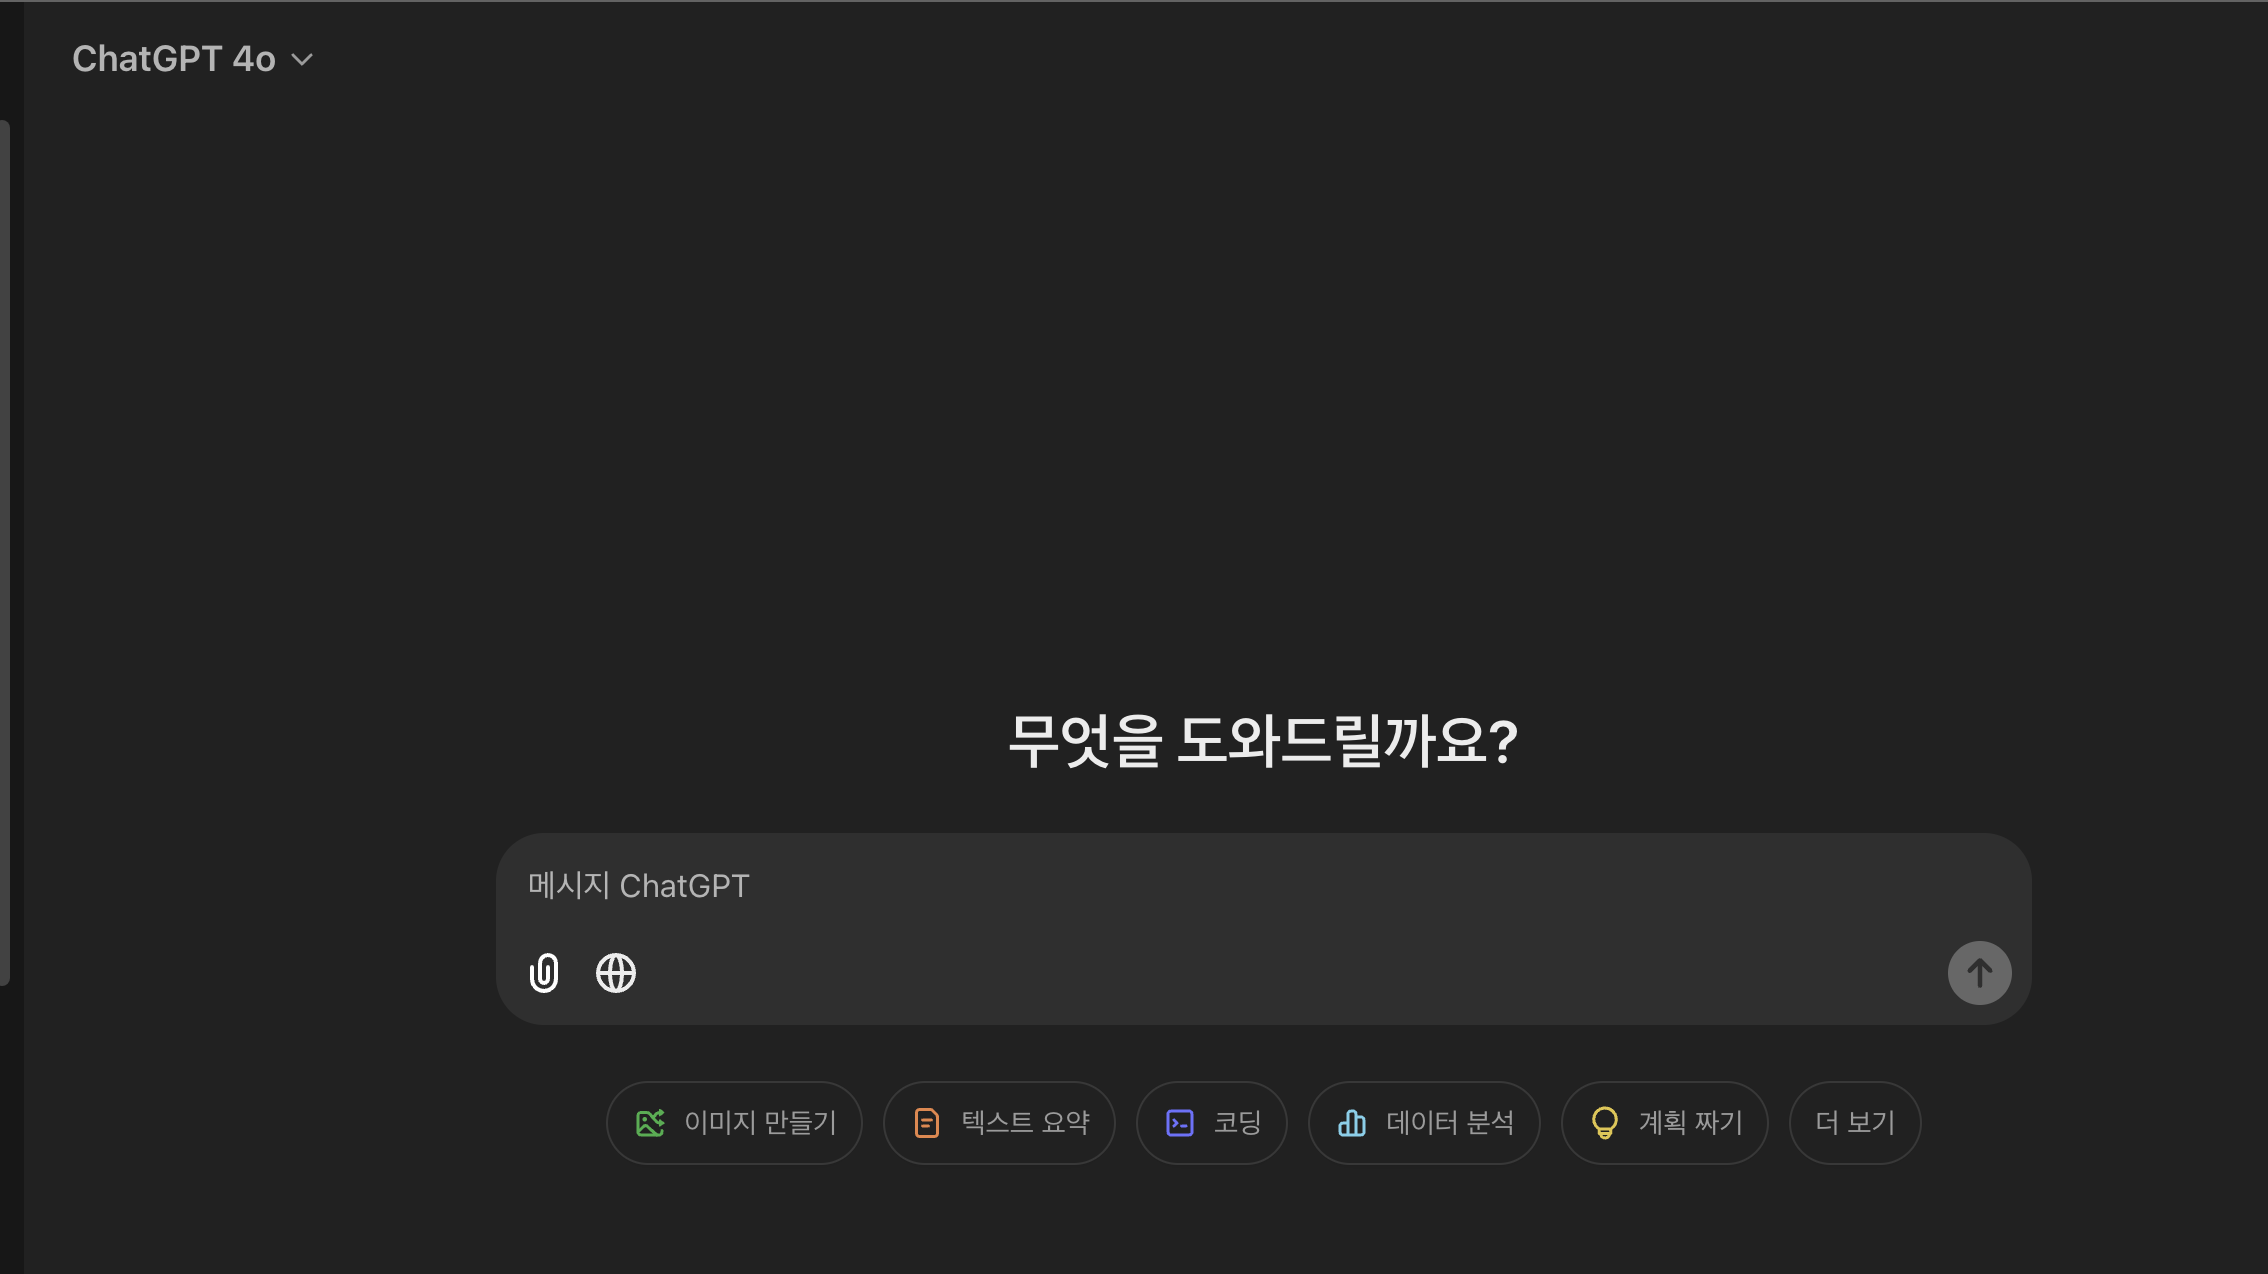

웹 디자인 화면을 개선하기 위한 몇 가지 제안 사항입니다:

1. **대비 향상**: 배경과 텍스트의 대비를 높여 가독성을 향상시킬 수 있습니다. 특히 어두운 배경에서는 밝은 색상의 텍스트가 더 잘 보입니다.

2. **명확한 아이콘**: 아이콘의 크기와 디자인을 조정하여 더 명확하게 보이도록 할 수 있습니다. 사용자가 쉽게 이해할 수 있도록 직관적인 디자인을 고려하세요.

3. **공간 활용**: 화면의 여백을 적절히 활용하여 요소 간의 간격을 조정하면 더 깔끔한 레이아웃을 만들 수 있습니다.

4. **일관성 유지**: 버튼과 텍스트 스타일의 일관성을 유지하여 사용자 경험을 향상시킬 수 있습니다. 예를 들어, 버튼의 모양과 색상을 통일하세요.

5. **접근성 고려**: 색맹 사용자나 시각 장애인을 위한 접근성을 고려하여 디자인을 조정할 수 있습니다. 예를 들어, 색상 외에도 텍스트나 아이콘을 사용하여 정보를 전달하세요.

이러한 개선 사항을 통해 사용자 친화적인 웹 디자인을 만들 수 있습니다.

In [10]:
from langchain_openai import ChatOpenAI
from multimodal import MultiModal

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

system_prompt = """당신은 UI/UX를 디자인하는 기획 AI 어시스턴트 입니다. 
당신의 임무는 주어진 화면을 바탕으로 보안되어야 할 점들을 찾아 친절하게 답변하는 것입니다."""

user_prompt = """당신에게 주어진 이미지는 웹 디자인 화면입니다. 좀 더 개선되었으면 하는 것을 알려주세요."""

multimodal_llm = MultiModal(llm, system_prompt, user_prompt)

IMAGE = ("../images/sample.png", "image")

# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "../images/sample.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력
for token in answer:
    print(token.content, end="", flush=True)